In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv("housing.csv") 

In [58]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [59]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [60]:
data.dropna(inplace=True)

In [61]:
from sklearn.model_selection import train_test_split 

X=data.drop(['median_house_value'], axis=1) 
y=data['median_house_value']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [63]:
train_data=X_train.join(y_train)

In [64]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8144,-118.09,33.83,36.0,2734.0,448.0,1308.0,441.0,5.9265,<1H OCEAN,227300.0
12746,-121.37,38.63,32.0,3658.0,797.0,1452.0,715.0,2.6623,INLAND,120700.0
15403,-117.23,33.24,26.0,1991.0,330.0,1014.0,304.0,4.3068,<1H OCEAN,240100.0
18337,-122.15,37.44,52.0,1400.0,217.0,522.0,227.0,4.9861,NEAR BAY,500001.0
2681,-115.54,32.99,23.0,1459.0,373.0,1148.0,388.0,1.5372,INLAND,69400.0
...,...,...,...,...,...,...,...,...,...,...
9060,-118.14,34.68,25.0,1703.0,342.0,775.0,309.0,4.5455,INLAND,126500.0
9931,-122.30,38.29,20.0,1789.0,434.0,1113.0,398.0,2.4728,NEAR BAY,139700.0
4033,-118.55,34.17,36.0,2127.0,297.0,761.0,274.0,7.8392,<1H OCEAN,500001.0
18330,-122.14,37.45,48.0,2074.0,297.0,700.0,279.0,8.7051,NEAR BAY,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

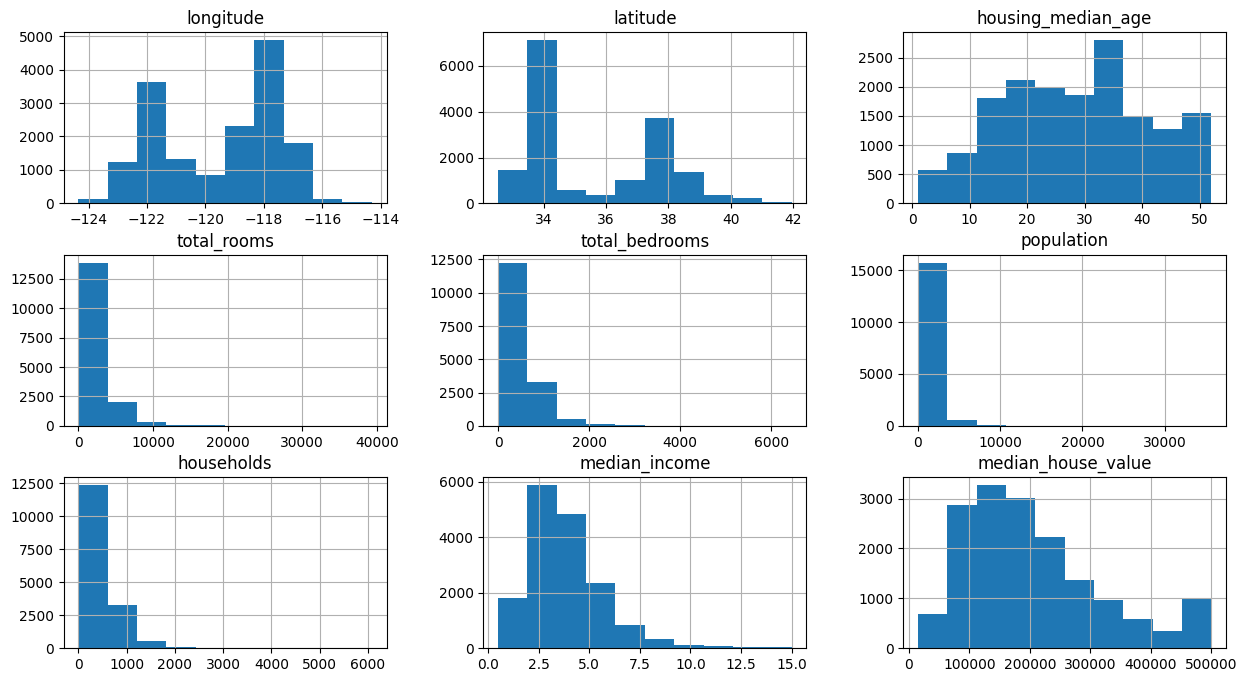

In [65]:
train_data.hist(figsize=(15,8)) 

In [66]:
train_data['total_room'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_rooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_room'}>, <Axes: >, <Axes: >]],
      dtype=object)

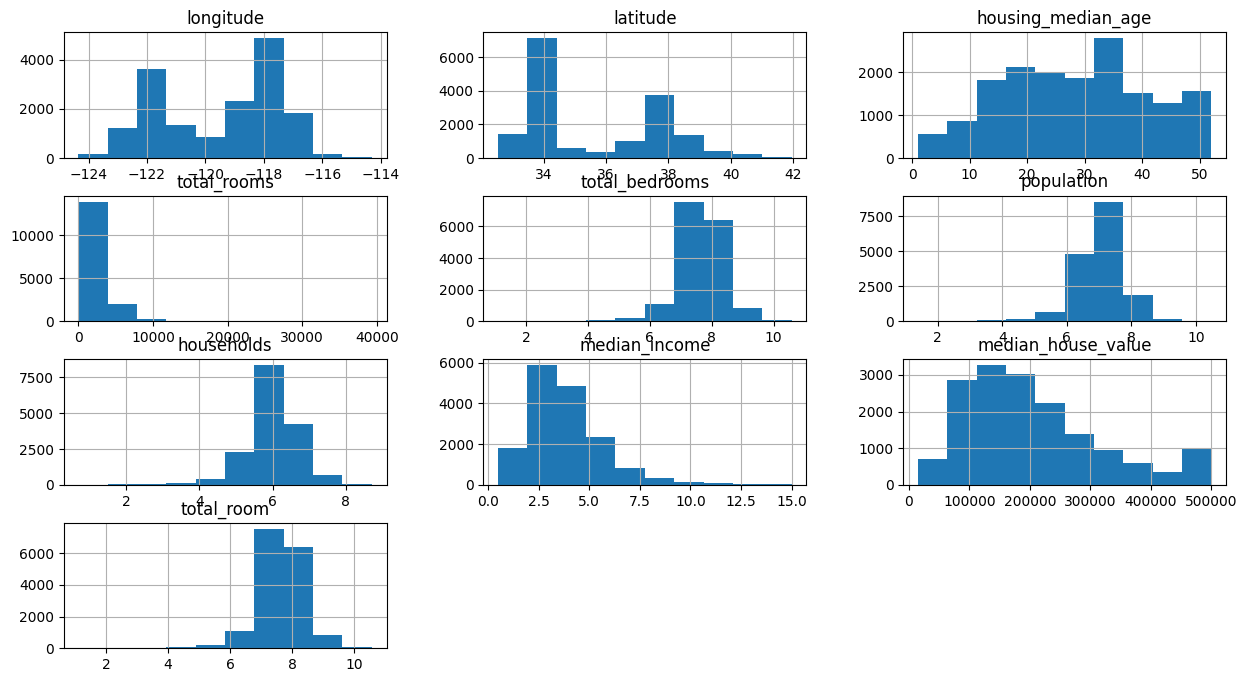

In [67]:
train_data.hist(figsize=(15, 8)) 

In [68]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [69]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8144,-118.09,33.83,36.0,2734.0,7.913887,7.177019,6.091310,5.9265,227300.0,7.913887,True,False,False,False,False
12746,-121.37,38.63,32.0,3658.0,8.204945,7.281386,6.573680,2.6623,120700.0,8.204945,False,True,False,False,False
15403,-117.23,33.24,26.0,1991.0,7.596894,6.922644,5.720312,4.3068,240100.0,7.596894,True,False,False,False,False
18337,-122.15,37.44,52.0,1400.0,7.244942,6.259581,5.429346,4.9861,500001.0,7.244942,False,False,False,True,False
2681,-115.54,32.99,23.0,1459.0,7.286192,7.046647,5.963579,1.5372,69400.0,7.286192,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9060,-118.14,34.68,25.0,1703.0,7.440734,6.654153,5.736572,4.5455,126500.0,7.440734,False,True,False,False,False
9931,-122.30,38.29,20.0,1789.0,7.489971,7.015712,5.988961,2.4728,139700.0,7.489971,False,False,False,True,False
4033,-118.55,34.17,36.0,2127.0,7.662938,6.635947,5.616771,7.8392,500001.0,7.662938,True,False,False,False,False
18330,-122.14,37.45,48.0,2074.0,7.637716,6.552508,5.634790,8.7051,500001.0,7.637716,False,False,False,True,False


<Axes: xlabel='latitude', ylabel='longitude'>

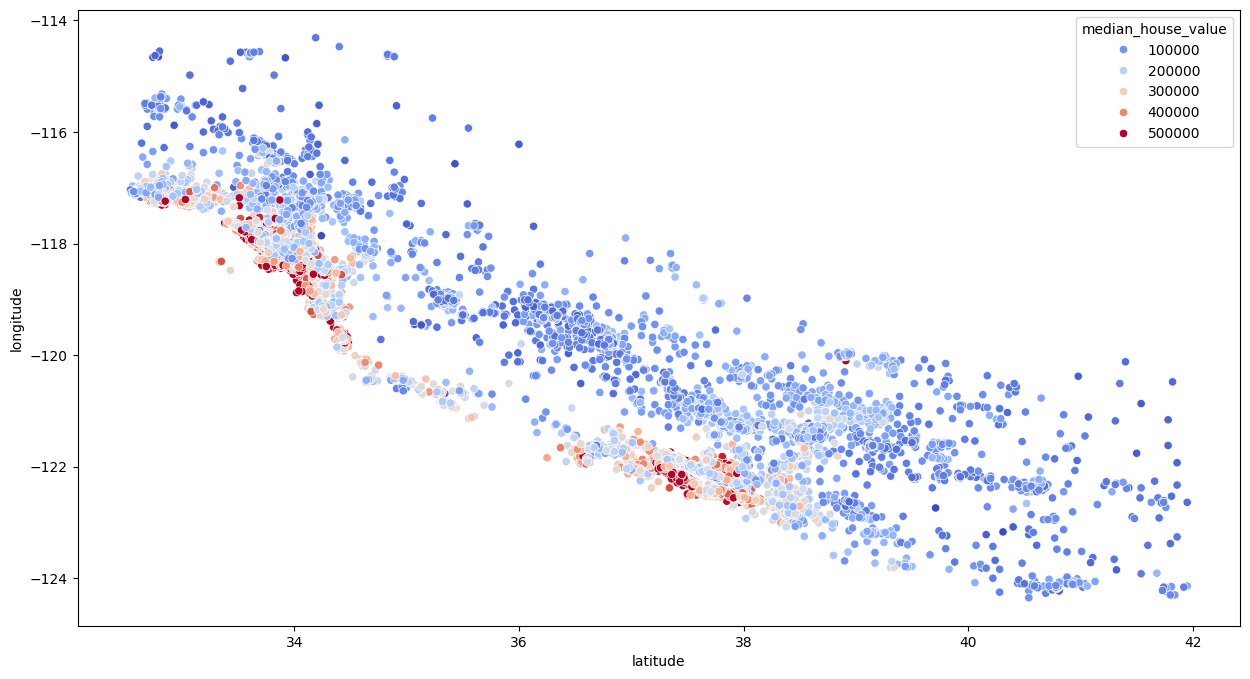

In [70]:
plt.figure(figsize=(15,8)) 
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [71]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

<Axes: >

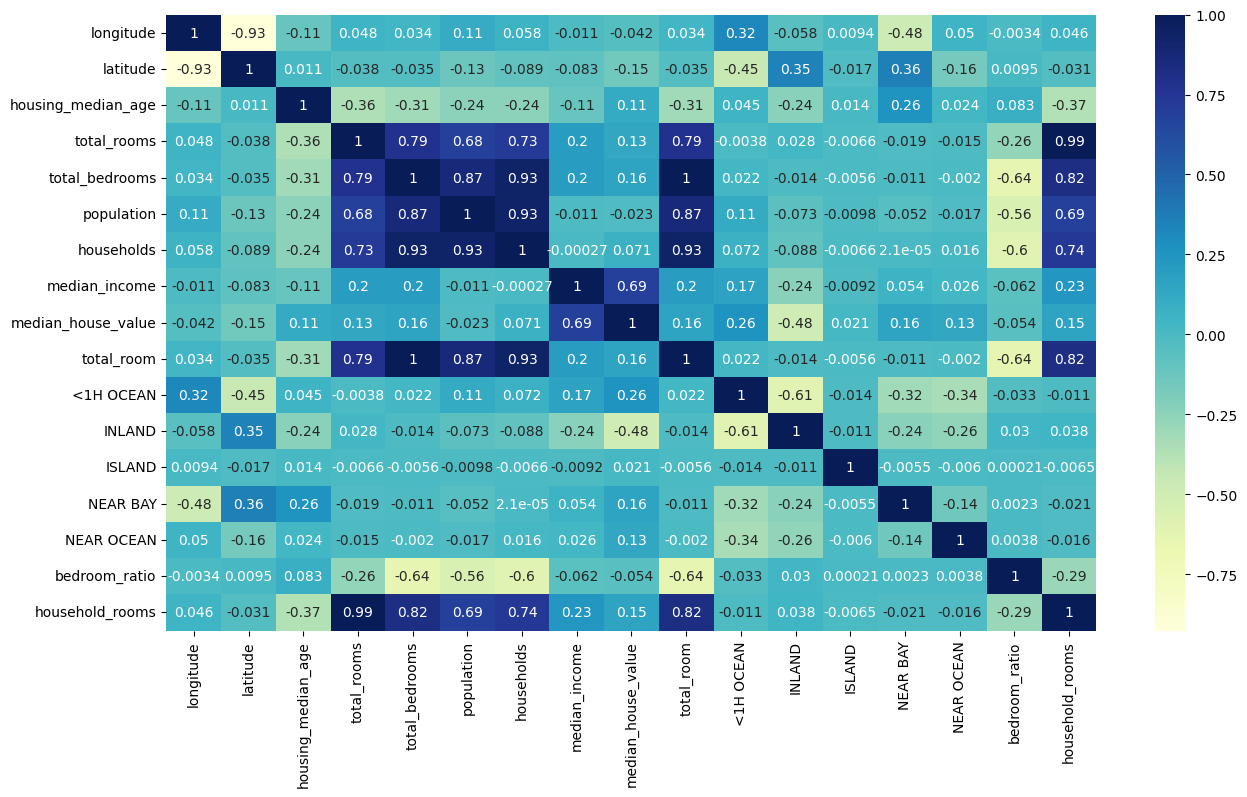

In [72]:
plt.figure(figsize=(15,8)) 
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [73]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() 
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train) 
reg = LinearRegression() 
reg.fit(X_train, y_train) 

LinearRegression()

In [74]:
test_data=X_test.join(y_test)

test_data['total_room'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]


In [75]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [76]:
reg.score(X_test, y_test) 

0.6731443875207002

In [78]:
from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor()

forest.fit(X_train, y_train) 

RandomForestRegressor()

In [79]:
forest.score(X_test, y_test) 

0.815453234665892

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor() 

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4], 
    "max_depth": [None, 4, 8]
} 

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error", 
                           return_train_score=True) 
grid_search.fit(X_train, y_train) 

In [ ]:
best_forest = grid_search.best_estimator_ 